In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib

In [ ]:
upMainID = 716142; downMainID = 716143
upMainData = sensorData_03_04[upMainID]
downMainData = sensorData_03_04[downMainID]

varyingCap = []
upMainFlow = []
for d in pd.unique(upMainData['date']):
    if d in pd.unique(downMainData['date']):
        _upMainFlow  = np.array(upMainData[upMainData['date']==d]['total_flow'], dtype=np.float32)
        _upMainSpeed = np.array(upMainData[upMainData['date']==d]['avg_speed'], dtype=np.float32)
        _upMainDen = _upMainFlow / _upMainSpeed
        
        _downMainFlow  = np.array(downMainData[downMainData['date']==d]['total_flow'], dtype=np.float32)
        _downMainSpeed = np.array(downMainData[downMainData['date']==d]['avg_speed'], dtype=np.float32)
        _downMainDen = _downMainFlow / _downMainSpeed
        
        varyingCap.extend(list(_upMainFlow * (_upMainDen >= criticalDen[upMainID]) * (_downMainDen <= criticalDen[downMainID])))
        upMainFlow.extend(list(_upMainFlow))

F = upMainFlow[0]
plt.figure(figsize=(14, 14))
for i in range(len(varyingCap) // numPerDay):
    if varyingCap[i*numPerDay] > 0:
        F = upMainFlow[i*numPerDay]
    for j in range(numPerDay):
        if varyingCap[i*numPerDay+j] == 0:
            F = max(F, upMainFlow[i*numPerDay+j])
            varyingCap[i*numPerDay+j] = F
            
    plt.subplot(4, 4, i+1)
    plt.plot(range(numPerDay), varyingCap[(i*numPerDay):(i*numPerDay+numPerDay)])
    
plt.ylim([5000, 8000])
plt.tight_layout()
plt.show()

In [29]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['mathtext.fontset'] = 'stix'

matplotlib.rcParams['text.usetex'] = True

In [2]:
loops = pd.read_excel('OriginalData/stations.xlsx')
loops.head()

,Fwy,District,County,City,CA PM,Abs PM,Length,ID,Name,Lanes,Type,Sensor Type,HOV,MS ID,IRM
0,I210-E,7,Los Angeles,NaN,R29.74,30.029,0.429,717654,ROSEMEAD 1,4,Mainline,loops,No,4253,NaN
1,I210-E,7,Los Angeles,NaN,R29.74,30.029,NaN,716598,ROSEMEAD NB,1,On Ramp,loops,No,4253,NaN
2,I210-E,7,Los Angeles,NaN,R29.74,30.029,0.429,737490,ROSEMEAD 1,1,HOV,loops,24H,4253,NaN
3,I210-E,7,Los Angeles,Arcadia,R30.01,30.299,NaN,716600,MICHILLINDA,1,On Ramp,loops,No,4254,NaN
4,I210-E,7,Los Angeles,Arcadia,R30.01,30.299,0.330,717659,MICHILLINDA,4,Mainline,loops,No,4254,NaN


In [3]:
mainLoops = loops[loops['Type']=="Mainline"]
onLoops = loops[loops['Type']=="On Ramp"]
offLoops = loops[((loops['Type']=="Off Ramp") | ((loops['Type']=="Fwy-Fwy")))]

In [4]:
mainVol = dict()
mainSpd = dict()
mainObs = dict()

onVol = dict()
offVol = dict()

In [5]:
for i in mainLoops['ID']:
    loopData = pd.read_excel('OriginalData/stationdata/{}.xlsx'.format(i))
    mainVol[i] = loopData['Flow (Veh/5 Minutes)']
    mainSpd[i] = loopData['Speed (mph)']
    mainObs[i] = loopData['% Observed']
    
mainVol = pd.DataFrame(mainVol)
mainSpd = pd.DataFrame(mainSpd)
mainObs = pd.DataFrame(mainObs)

for j in [mainVol, mainSpd, mainObs]:
    j.set_index(loopData['5 Minutes'], inplace=True)
    
mainVol = mainVol.transpose()
mainSpd = mainSpd.transpose()
mainObs = mainObs.transpose()

mainDen = mainVol / (mainSpd+0.0001)

for i in onLoops['ID']:
    loopData = pd.read_excel('OriginalData/stationdata/{}.xlsx'.format(i))
    onVol[i] = loopData['Flow (Veh/5 Minutes)']
onVol = pd.DataFrame(onVol)
onVol.set_index(loopData['5 Minutes'], inplace=True)
onVol = onVol.transpose()

for i in offLoops['ID']:
    loopData = pd.read_excel('OriginalData/stationdata/{}.xlsx'.format(i))
    offVol[i] = loopData['Flow (Veh/5 Minutes)']
offVol = pd.DataFrame(offVol)
offVol.set_index(loopData['5 Minutes'], inplace=True)
offVol = offVol.transpose()

In [6]:
mainSpd.head()

5 Minutes,5/05/2019 0:00,5/05/2019 0:05,5/05/2019 0:10,5/05/2019 0:15,5/05/2019 0:20,5/05/2019 0:25,5/05/2019 0:30,5/05/2019 0:35,5/05/2019 0:40,5/05/2019 0:45,...,5/11/2019 23:10,5/11/2019 23:15,5/11/2019 23:20,5/11/2019 23:25,5/11/2019 23:30,5/11/2019 23:35,5/11/2019 23:40,5/11/2019 23:45,5/11/2019 23:50,5/11/2019 23:55
717654,65.4,63.8,64.1,63.5,62.7,63.3,62.9,64.6,63.3,64.7,...,70.0,69.5,68.0,68.7,68.0,68.8,68.4,65.8,67.7,67.4
717659,65.1,64.6,65.0,64.5,65.3,64.0,65.0,66.2,64.1,66.1,...,71.2,71.2,69.5,69.6,69.7,70.4,70.3,67.8,70.0,69.3
773154,68.9,67.9,67.8,67.6,68.4,66.9,68.5,70.0,67.8,70.2,...,74.1,74.7,72.5,73.3,72.5,72.8,72.9,70.5,72.9,72.0
717667,63.1,62.7,62.5,62.2,64.3,62.6,64.5,64.6,63.0,65.4,...,71.6,71.2,70.2,69.9,70.7,69.5,69.3,66.7,67.3,67.8
717672,62.4,63.9,63.1,63.0,64.4,63.4,63.1,64.4,64.5,65.0,...,71.5,71.9,69.7,68.8,69.8,70.7,70.5,69.8,70.4,68.9


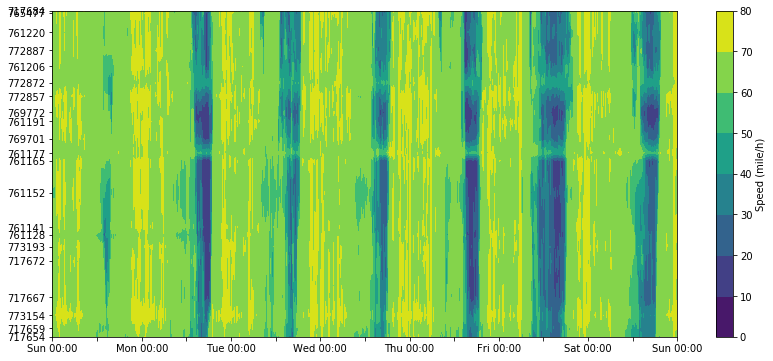

In [7]:
x, y = np.meshgrid(range(2016), mainLoops['Abs PM'])

plt.figure(figsize=(14, 6))
plt.contourf(x, y, mainSpd)

plt.gca().set_yticks(mainLoops['Abs PM'])
plt.gca().set_yticklabels(mainLoops['ID'])

plt.gca().set_xticks([144*i for i in range(15)])
plt.gca().set_xticklabels(['Sun 00:00', '', 'Mon 00:00', '', 'Tue 00:00', '', 'Wed 00:00', '',
                           'Thu 00:00', '', 'Fri 00:00', '', 'Sat 00:00', '', 'Sun 00:00'])

cb = plt.colorbar()
cb.ax.set_ylabel('Speed (mile/h)')

plt.show()

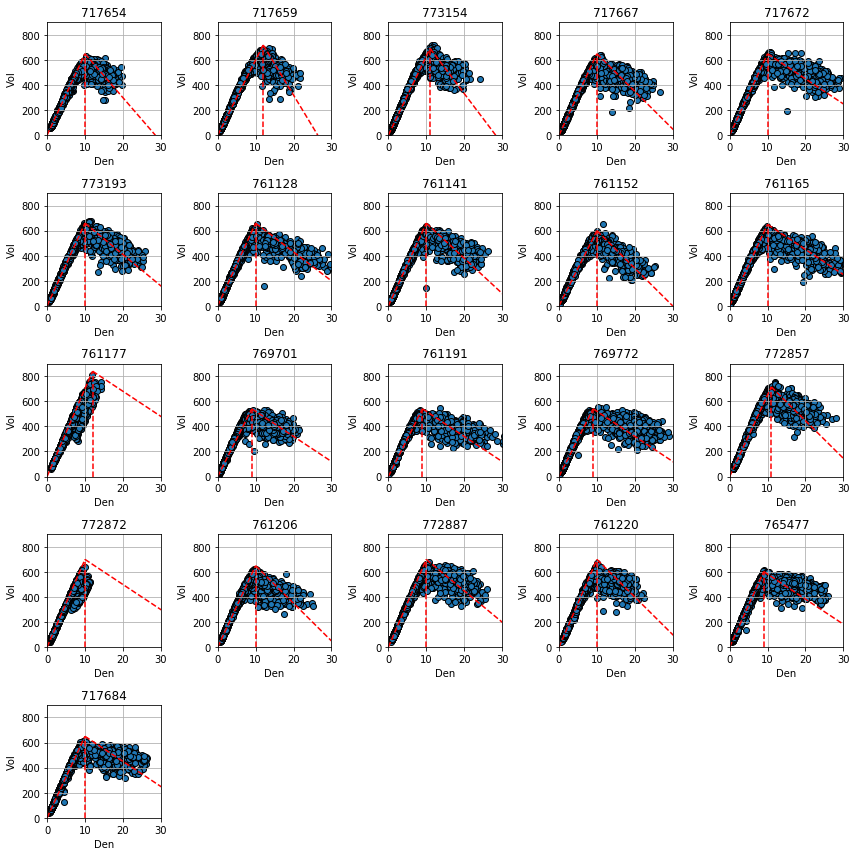

In [8]:
optDen = [10, 12, 11, 10, 10,
          10, 10, 10, 10, 10,
          12,  9,  9,  9, 11,
          10, 10, 10, 10,  9,
          10]

freeSpd = [65, 60, 63, 65, 65,
           66, 66, 66, 60, 65,
           70, 60, 60, 60, 65,
           70, 65, 70, 70, 67,
           65]

congSpd = [35, 50, 40, 30, 20,
           25, 23, 28, 30, 20,
           20, 20, 20, 20, 30,
           20, 30, 25, 30, 20,
           20]


plt.figure(figsize=(12, 12))
for i, j in enumerate(mainLoops['ID']):
    plt.subplot(5, 5, i+1)
    plt.scatter(mainDen.loc[j], mainVol.loc[j], edgecolors='k')
    plt.xlim([0, 30])
    plt.ylim([0, 900])
    plt.plot([optDen[i]]*2, [0, optDen[i]*freeSpd[i]], 'r--')
    plt.plot([0, optDen[i]], [0, optDen[i]*freeSpd[i]], 'r--')
    plt.plot([optDen[i], optDen[i]+optDen[i]*freeSpd[i]/congSpd[i]], [optDen[i]*freeSpd[i], 0], 'r--')
    plt.title(j)
    plt.xlabel('Den')
    plt.ylabel('Vol')
    plt.grid()
    
plt.tight_layout()
plt.show()

In [10]:
np.max(mainVol.loc[761128])

653

In [11]:
optDen[6] * freeSpd[6]

660

In [12]:
isLessThanOptDen = {}
for i, j in enumerate(mainLoops['ID']):
    isLessThanOptDen[j] = mainDen.loc[j] < optDen[i] 

isLessThanOptDen = pd.DataFrame(isLessThanOptDen).transpose()
isLessThanOptDen.head()

5 Minutes,5/05/2019 0:00,5/05/2019 0:05,5/05/2019 0:10,5/05/2019 0:15,5/05/2019 0:20,5/05/2019 0:25,5/05/2019 0:30,5/05/2019 0:35,5/05/2019 0:40,5/05/2019 0:45,...,5/11/2019 23:10,5/11/2019 23:15,5/11/2019 23:20,5/11/2019 23:25,5/11/2019 23:30,5/11/2019 23:35,5/11/2019 23:40,5/11/2019 23:45,5/11/2019 23:50,5/11/2019 23:55
717654,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
717659,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
773154,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
717667,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
717672,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [13]:
mainCap = {}
for i in range(20):
    current = mainLoops['ID'].iloc[i]
    downstr = mainLoops['ID'].iloc[i+1]

    mainCap[current] = mainVol.loc[current] * ((1-isLessThanOptDen.loc[current]) & (isLessThanOptDen.loc[downstr]))
    
mainCap = pd.DataFrame(mainCap).transpose()
mainCap.head()

5 Minutes,5/05/2019 0:00,5/05/2019 0:05,5/05/2019 0:10,5/05/2019 0:15,5/05/2019 0:20,5/05/2019 0:25,5/05/2019 0:30,5/05/2019 0:35,5/05/2019 0:40,5/05/2019 0:45,...,5/11/2019 23:10,5/11/2019 23:15,5/11/2019 23:20,5/11/2019 23:25,5/11/2019 23:30,5/11/2019 23:35,5/11/2019 23:40,5/11/2019 23:45,5/11/2019 23:50,5/11/2019 23:55
717654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
717659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
773154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
717667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
717672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for i in range(20):
    current = mainLoops['ID'].iloc[i]
    F = mainCap.loc[current][0]
    for j in range(2016):
        if mainCap.loc[current][j] == 0:
            F = max(F, mainVol.loc[current][j])
            mainCap.loc[current][j] = F

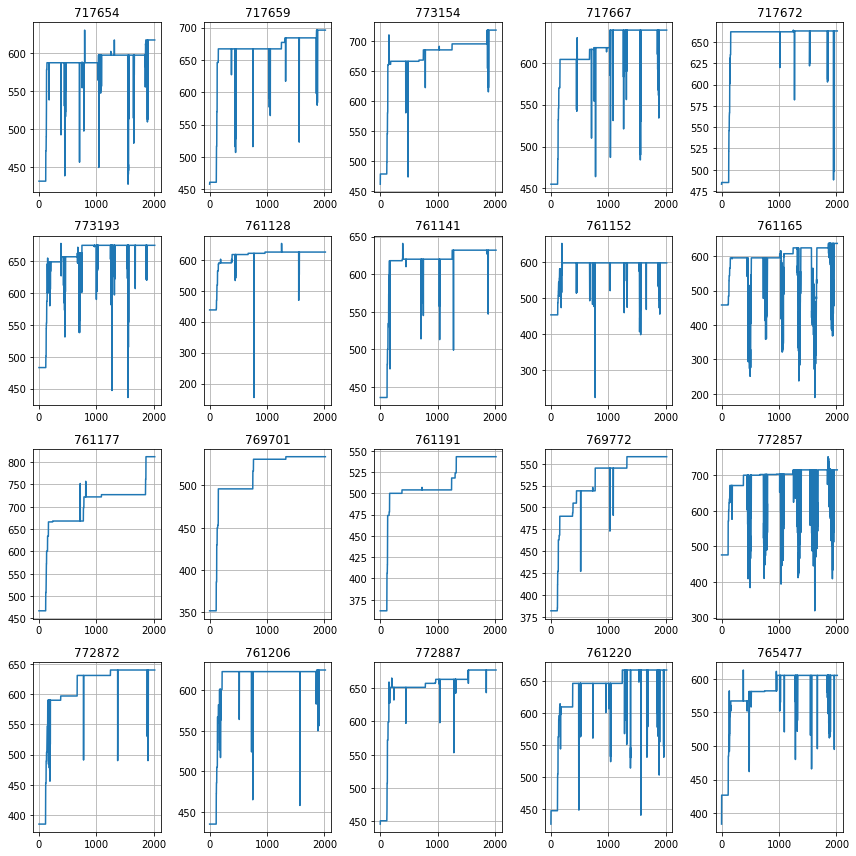

In [15]:
plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    current = mainLoops['ID'].iloc[i]
    plt.plot(range(2016), mainCap.loc[current])
    plt.title(current)
    plt.grid()
    
plt.tight_layout()
plt.show()

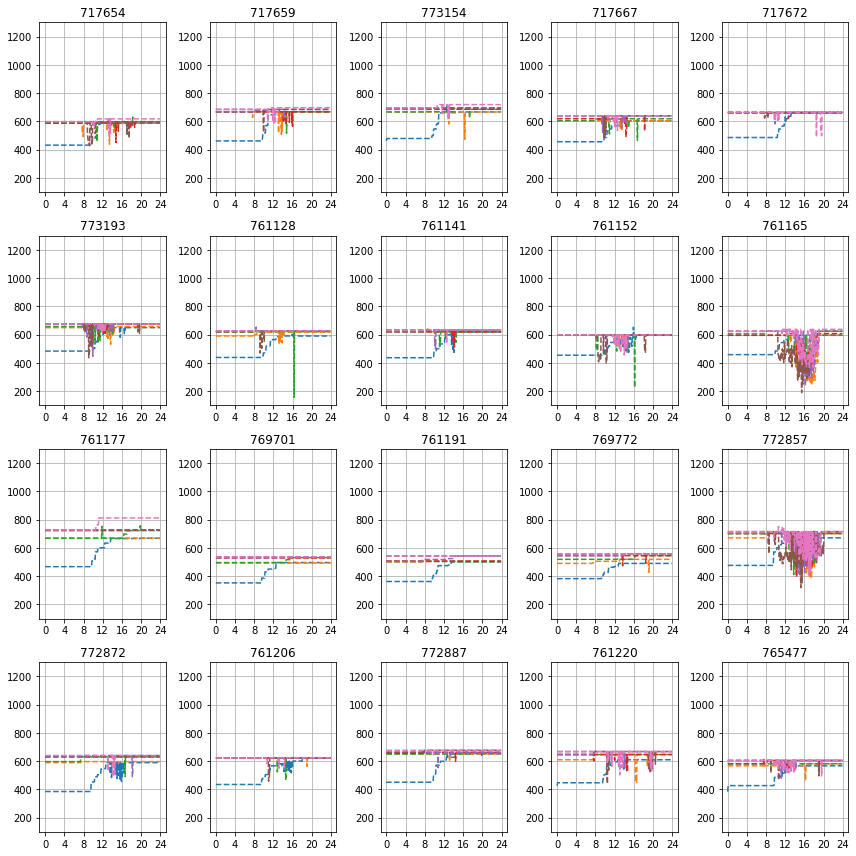

In [16]:
plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    current = mainLoops['ID'].iloc[i]
    for j in range(7):
        plt.plot(range(288), mainCap[mainCap.columns[(288*j):(288*j+288)]].loc[current], '--')
    plt.title(current)
    plt.gca().set_xticks([0, 48, 96, 144, 192, 240, 288])
    plt.gca().set_xticklabels(['0', '4', '8', '12', '16', '20', '24'])
    plt.ylim([100, 1300])
    plt.grid()
plt.tight_layout()
plt.show()

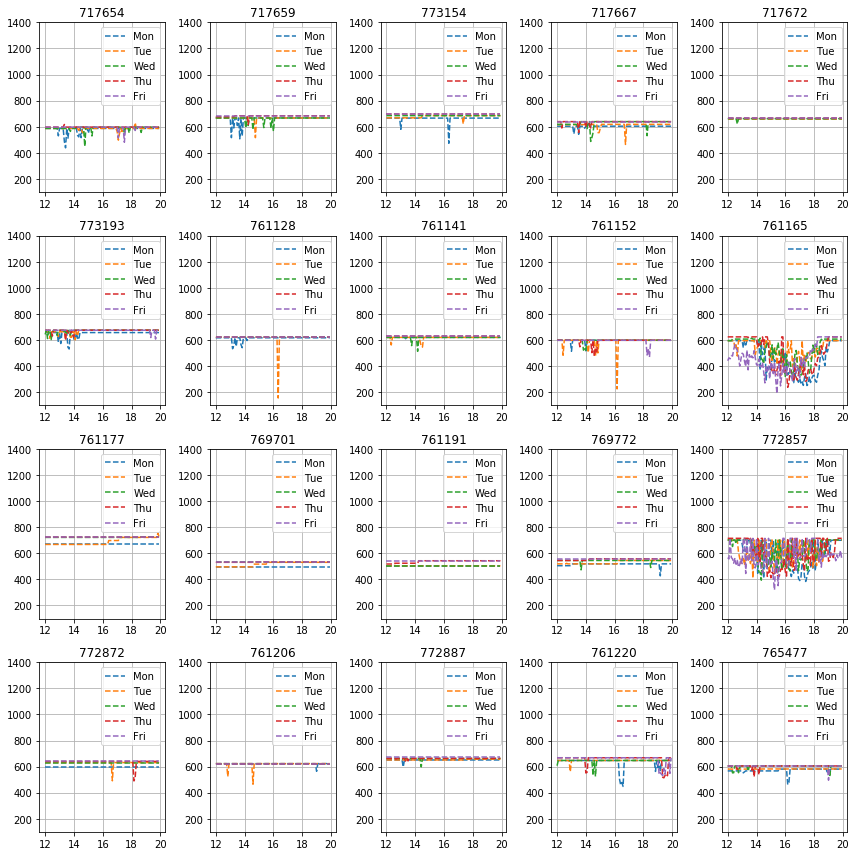

In [17]:
plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(4, 5, i+1)
    current = mainLoops['ID'].iloc[i]
    for j in range(1, 6):
        plt.plot(range(144, 240), mainCap[mainCap.columns[(288*j+144):(288*j+240)]].loc[current], '--')
    plt.title(current)
    plt.gca().set_xticks([144, 168, 192, 216, 240])
    plt.gca().set_xticklabels(['12', '14', '16', '18', '20'])
    plt.ylim([100, 1400])
    plt.legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
    plt.grid()
plt.tight_layout()
plt.show()

In [18]:
var1 = []; avg = [];

var2 = []; lower = []; upper = []

for i in range(20):
    current = mainLoops['ID'].iloc[i]
    cap = []
    for j in range(1, 6):
        cap.extend(list(mainCap[mainCap.columns[(288*j+144):(288*j+240)]].loc[current]))
    cap = np.array(cap)
    var1.append(np.std(cap))
    
    meanCap = np.mean(cap)
    avg.append(meanCap)
    
    maxCap = np.max(cap)
    minCap = np.min(cap)
    err = 1e5
    for l in np.linspace(minCap, meanCap, 10):
        for u in np.linspace(meanCap, maxCap, 10):
            estimated = (np.abs(cap-l)>=np.abs(cap-u)) * u + (np.abs(cap-l)<np.abs(cap-u)) * l
            tmpErr = np.sqrt(np.mean((cap-estimated)**2))
            if  tmpErr < err:
                err = tmpErr
                tmpL = l
                tmpU = u
            
    var2.append(err)
    lower.append(tmpL)
    upper.append(tmpU)

In [20]:
mainLoops['ID'].iloc[i]

765477

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


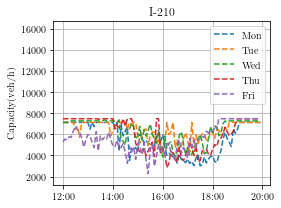

In [31]:
plt.figure(figsize=(4, 3))

current = 761165
for j in range(1, 6):
    plt.plot(range(144, 240), 12*mainCap[mainCap.columns[(288*j+144):(288*j+240)]].loc[current], '--')
plt.title('I-210')
plt.gca().set_xticks([144, 168, 192, 216, 240])
plt.gca().set_xticklabels(['12:00', '14:00', '16:00', '18:00', '20:00'])
plt
plt.ylim([1200, 1400*12])
plt.legend(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.grid()
plt.ylabel('Capacity(veh/h)')

plt.tight_layout()
plt.savefig('CapVar.eps')

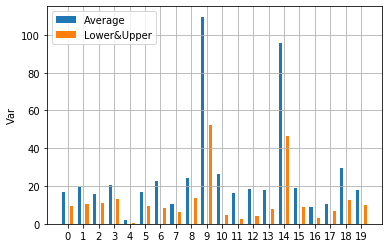

In [19]:
plt.bar(np.arange(20)-0.25, var1, width=0.2)
plt.bar(np.arange(20)+0.25, var2, width=0.2)
plt.gca().set_xticks(np.arange(20))
plt.grid()
plt.legend(['Average', 'Lower&Upper'])
plt.ylabel('Var')
plt.show()

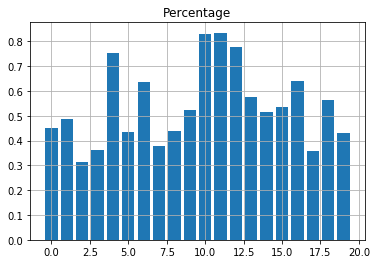

In [17]:
plt.bar(range(20), (np.array(var1)-np.array(var2))/(np.array(var1)+0.01))
plt.title('Percentage')
plt.grid()
plt.show()

In [18]:
transMat = []
numLowers, numUppers = [], []
numL2Us, numU2Ls = [], []

for i in range(20):
    current = mainLoops['ID'].iloc[i]
    numLower, numUpper = 0, 0
    numL2U, numU2L = 0, 0
    for j in range(1, 6):
        cap = np.array(mainCap[mainCap.columns[(288*j+144):(288*j+240)]].loc[current])
        isUpper = np.abs(cap-lower[i])>=np.abs(cap-upper[i])
        numUpper += np.sum(isUpper)
        numLower += len(isUpper) - np.sum(isUpper)
        
        for k in range(len(isUpper)-1):
            if isUpper[k] and (not isUpper[k+1]):
                numU2L += 1
            elif (not isUpper[k]) and isUpper[k+1]:
                numL2U += 1
    
    transMat.append([[0, 0], [0, 0]])
    
    transMat[-1][0][0] = round(1 -  numL2U / (numLower+1e-5), 2)
    transMat[-1][0][1] = round(numL2U / (numLower+1e-5), 2)
    transMat[-1][1][0] = round(numU2L / (numUpper+1e-5), 2)
    transMat[-1][1][1] = round(1 - numU2L / (numUpper+1e-5), 2)
    
    numLowers.append(numLower)
    numUppers.append(numUpper)
    
    numL2Us.append(numL2U)
    numU2Ls.append(numU2L)

In [19]:
np.array(transMat)

array([[[0.21, 0.79],
        [0.03, 0.97]],

       [[0.07, 0.93],
        [0.03, 0.97]],

       [[0.98, 0.02],
        [0.  , 1.  ]],

       [[0.96, 0.04],
        [0.03, 0.97]],

       [[0.  , 1.  ],
        [0.  , 1.  ]],

       [[0.2 , 0.8 ],
        [0.04, 0.96]],

       [[0.  , 1.  ],
        [0.  , 1.  ]],

       [[0.2 , 0.8 ],
        [0.01, 0.99]],

       [[0.13, 0.87],
        [0.03, 0.97]],

       [[0.83, 0.17],
        [0.12, 0.88]],

       [[0.99, 0.01],
        [0.  , 1.  ]],

       [[0.99, 0.01],
        [0.  , 1.  ]],

       [[1.  , 0.  ],
        [0.  , 1.  ]],

       [[0.99, 0.01],
        [0.  , 1.  ]],

       [[0.67, 0.33],
        [0.3 , 0.7 ]],

       [[0.98, 0.02],
        [0.01, 0.99]],

       [[0.  , 1.  ],
        [0.01, 0.99]],

       [[0.97, 0.03],
        [0.02, 0.98]],

       [[0.54, 0.46],
        [0.02, 0.98]],

       [[0.96, 0.04],
        [0.03, 0.97]]])

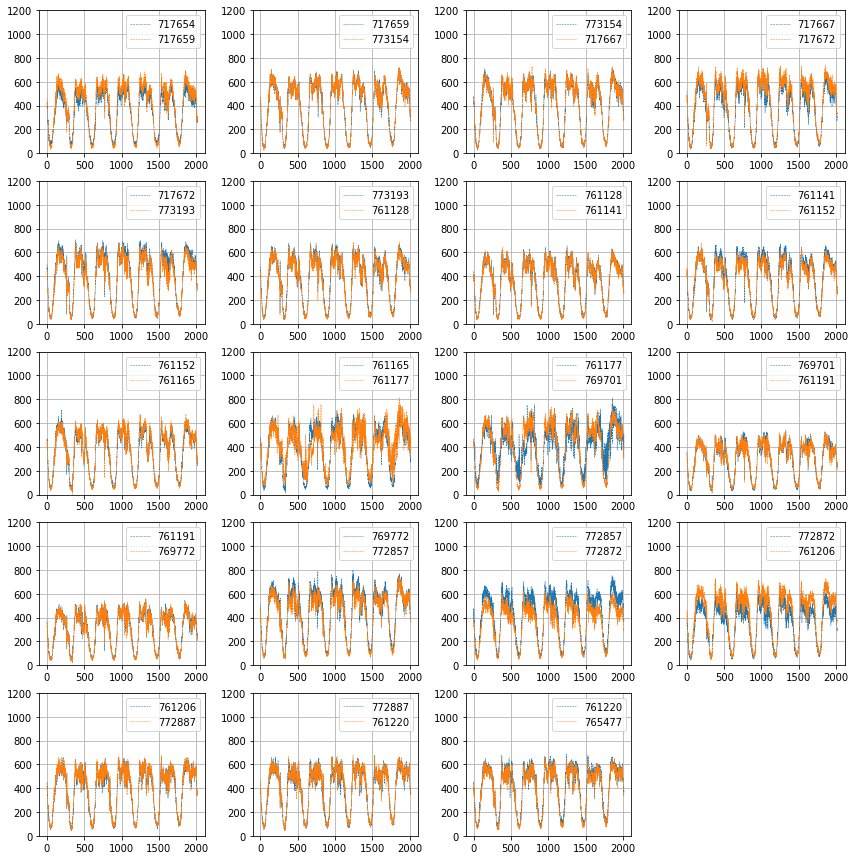

In [27]:
up = [[717654], [717659, 716600], [773154], [717667, 716603], [717672, 716605], [773193], [761128, 718205],
      [761141, 718207], [761152, 718209], [761165, 716606], [761177, 718212], [769701], [761191, 718213], 
      [769772, 769774], [772857], [772872], [761206, 718214], [772887], [761220, 718215]
     ]

down = [[717659], [773154], [717667, 717666], [717672, 717671], [773193], [761128, 761130], [761141], 
        [761152, 761154], [761165, 761167], [761177], [769701, 769705], [761191], [769772], [772857],
        [772872], [761206, 774990], [772887], [761220, 775859], [765477, 717680]]

plt.figure(figsize=(12, 12))

for i in range(19):
    plt.subplot(5, 4, i+1)
    if len(up[i]) == 1:
        a = mainVol.loc[up[i][0]]
    else:
        a = mainVol.loc[up[i][0]] + onVol.loc[up[i][1]]
    
    if len(down[i]) == 1:
        b = mainVol.loc[down[i][0]]
    else:
        b = mainVol.loc[down[i][0]] + offVol.loc[down[i][1]]    
    
    
    plt.plot(range(2016), a, '--', linewidth=0.5)
    plt.plot(range(2016), b, '--', linewidth=0.5)
    plt.ylim([0, 1200])
    plt.legend(mainVol.index[[i,i+1]])
    plt.grid()
    
plt.tight_layout()
plt.show()

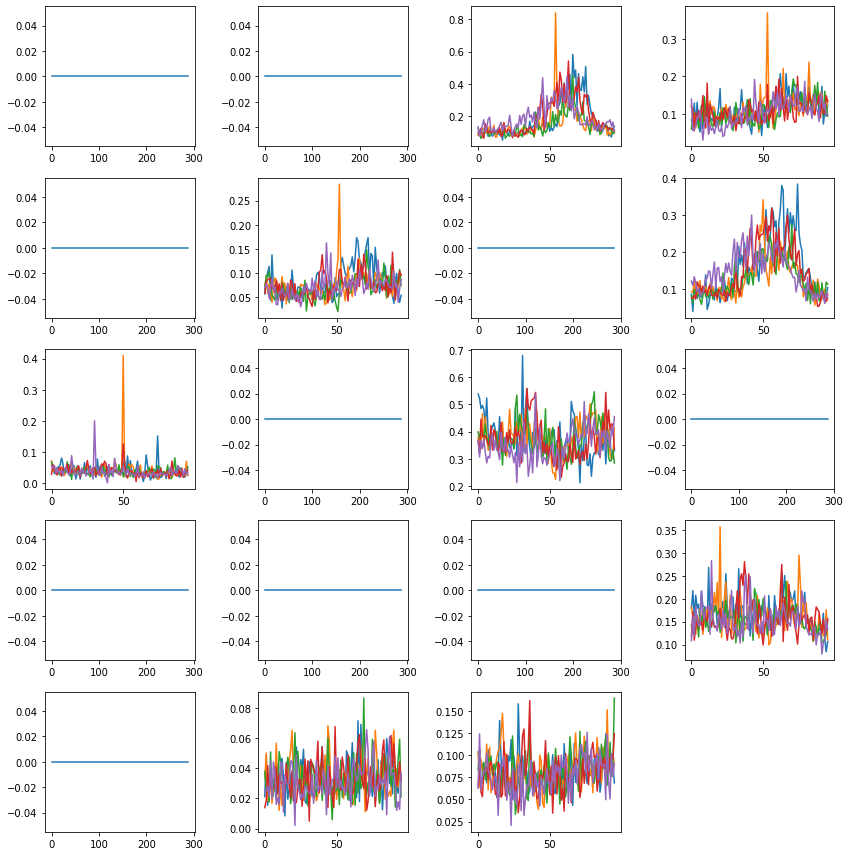

In [43]:
plt.figure(figsize=(12, 12))


for i in range(19):
    plt.subplot(5, 4, i+1)
    if len(down[i]) == 1:
        plt.plot([0, 287], [0, 0])
    else:
        for j in range(1, 6):
            plt.plot(range(96), offVol.loc[down[i][1]][(288*j+144):(j*288+240)]/mainVol.loc[down[i][0]][(288*j+144):(j*288+240)])
    
plt.tight_layout()
plt.show()

In [49]:
ratio = []
for i in range(19):
    if len(down[i]) > 1:
        ratio.append([])
        for j in range(16):
            m = []; o = []
            for k in range(1, 6):
                m.extend(list(mainVol.loc[down[i][0]][(288*k+144+j*6):(k*288+150+j*6)]))
                o.extend(list(offVol.loc[down[i][1]][(288*k+144+j*6):(k*288+150+j*6)]))
            ratio[-1].extend([np.mean(o)/(np.mean(o)+np.mean(m))]*6)


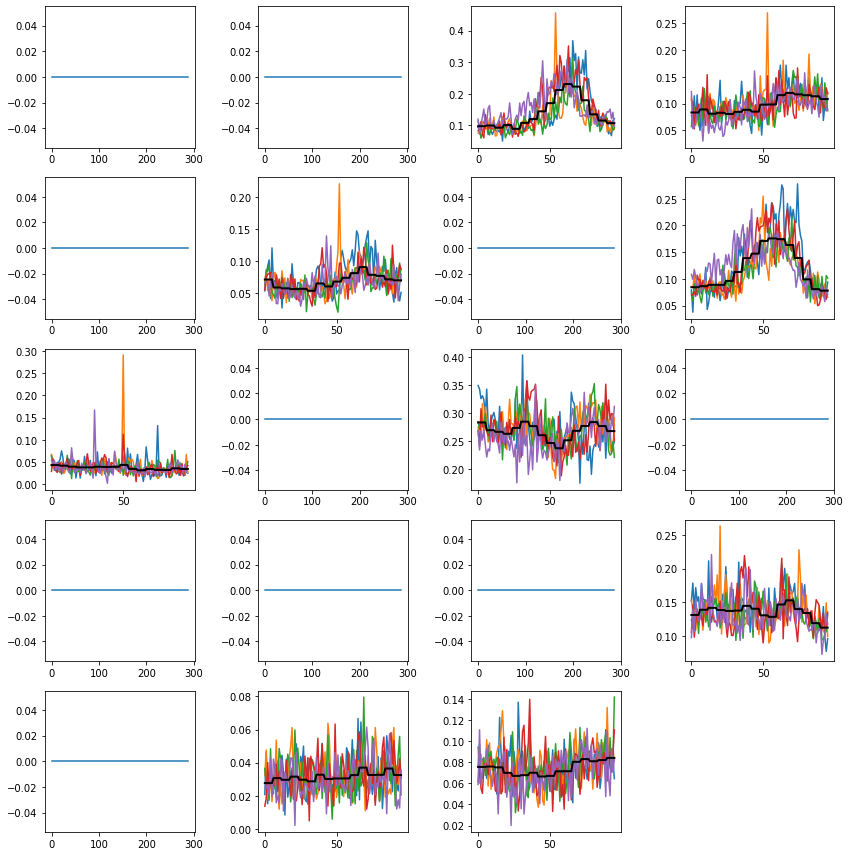

In [54]:
plt.figure(figsize=(12, 12))

k = 0
for i in range(19):
    plt.subplot(5, 4, i+1)
    if len(down[i]) == 1:
        plt.plot([0, 287], [0, 0])
    else:
        for j in range(1, 6):
            plt.plot(range(96), \
                     offVol.loc[down[i][1]][(288*j+144):(j*288+240)]/ \
                     (mainVol.loc[down[i][0]][(288*j+144):(j*288+240)]+offVol.loc[down[i][1]][(288*j+144):(j*288+240)]))
        
        plt.plot(range(96), ratio[k], 'k', linewidth=2)
        k += 1
    
plt.tight_layout()
plt.show()

In [56]:
ratio

[[0.0973217432162575,
  0.0973217432162575,
  0.0973217432162575,
  0.0973217432162575,
  0.0973217432162575,
  0.0973217432162575,
  0.09952848946202351,
  0.09952848946202351,
  0.09952848946202351,
  0.09952848946202351,
  0.09952848946202351,
  0.09952848946202351,
  0.0926600117439812,
  0.0926600117439812,
  0.0926600117439812,
  0.0926600117439812,
  0.0926600117439812,
  0.0926600117439812,
  0.10092886270956049,
  0.10092886270956049,
  0.10092886270956049,
  0.10092886270956049,
  0.10092886270956049,
  0.10092886270956049,
  0.08889891696750903,
  0.08889891696750903,
  0.08889891696750903,
  0.08889891696750903,
  0.08889891696750903,
  0.08889891696750903,
  0.10788725722406443,
  0.10788725722406443,
  0.10788725722406443,
  0.10788725722406443,
  0.10788725722406443,
  0.10788725722406443,
  0.12002479851208928,
  0.12002479851208928,
  0.12002479851208928,
  0.12002479851208928,
  0.12002479851208928,
  0.12002479851208928,
  0.1444279713367927,
  0.1444279713367927,
  

In [74]:
export = {}
export['Mon_717654'] = list(mainVol.loc[717654][(288*1+144):(288*1+240)])
export['Tue_717654'] = list(mainVol.loc[717654][(288*2+144):(288*2+240)])
export['Wed_717654'] = list(mainVol.loc[717654][(288*3+144):(288*3+240)])
export['Thu_717654'] = list(mainVol.loc[717654][(288*4+144):(288*4+240)])
export['Fri_717654'] = list(mainVol.loc[717654][(288*5+144):(288*5+240)])
for l in onLoops['ID']:
    for i, d in enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fri']):
        export['{}_{}'.format(d, l)] = list(onVol.loc[l][(288*(i+1)+144):(288*(i+1)+240)])

        
for i, r in enumerate(ratio):
    export['divergingRatio_{}'.format(i)] = np.round(r, 2)


pd.DataFrame(export).to_csv('export.csv')

In [80]:
(np.array(mainLoops['Abs PM'][1:]) - np.array(mainLoops['Abs PM'][:-1])) * 1.6

array([0.432 , 0.624 , 0.88  , 1.776 , 0.704 , 0.576 , 0.368 , 1.696 ,
       1.552 , 0.384 , 0.704 , 0.848 , 0.432 , 0.8   , 0.64  , 0.8144,
       0.7856, 0.88  , 0.944 , 0.112 ])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


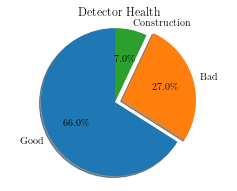

In [44]:
labels = 'Good', 'Bad', 'Construction'
sizes = [66, 27, 7]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.figure(figsize=(4, 3))
#fig1, ax1 = plt.subplots()
plt.gca().pie(sizes, explode=explode, labels=labels, autopct='%1.1f\%%',
        shadow=True, startangle=90)
plt.gca().axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Detector Health')

plt.savefig('Cyber.eps')